In [13]:
!pip install scipy

  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)


In [ ]:
!pip install Pillow

  Using cached pillow-11.0.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 1.5 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.6 MB 1.5 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.6 MB 1.3 MB/s eta 0:00:02
   -------------------- ------------------- 1.3/2.6 MB 1.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 1.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 1.3 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 840.2 kB/s eta 0:00:09
   ---- ----------------------------------- 0.8/7.8 MB 1.1 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/7.8 MB 968.5 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/7.8 MB 968.5 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/7.8 MB 894.7 kB/s eta 0:00:08
   -------- ------------------------------- 1.6/7.8 MB 943.0 kB/s eta 0:00:07
   -------- ------------------------------- 1.6/7.8 MB 943.0 kB/s eta 0:00:07
   --------- ------------------------------ 1.8/7.8 MB 898.8 kB/s eta 0:00:07
   ---------- ----------------------------- 2.1/7.8 MB 932.4 kB/s eta 0:00:07
   ------------ --------------------------- 2.4/7.8 MB 958.9 kB/s eta 0:00:06
   ------------

In [ ]:
#Importing necessary libraries
import numpy as np

import os
import math
import shutil
import glob

In [ ]:
#Step 1: Count the number of images we have in each class:
# class 0 is the glioma folder
# class 1 is the meningioma folder
# class 2 is the notumor folder
# class 3 is the pituitary folder

root_dir = "dataset\Training"
number_images = {} #the dict will have as key: name of folder and the number of images as values

for dir in os.listdir(root_dir):
    number_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

number_images.items() #=> output = dict_items([('glioma', 1321), ('meningioma', 1339), ('notumor', 1595), ('pituitary', 1457)])

root_dir1 = "dataset\Testing"
number_images1 = {} #the dict will have as key: name of folder and the number of images as values

for dir in os.listdir(root_dir1):
    number_images1[dir] = len(os.listdir(os.path.join(root_dir1, dir)))

number_images1.items() #=> output = dict_items([('glioma', 300), ('meningioma', 306), ('notumor', 405), ('pituitary', 300)])

dict_items([('glioma', 300), ('meningioma', 306), ('notumor', 405), ('pituitary', 300)])

In [ ]:
!pip install keras
!pip install tensorflow

  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached optree-0.13.1-cp311-cp311-win_amd64.whl.metadata (48 kB)
  Using cached ml_dtypes-0.5.0-cp311-cp311-win_amd64.whl.metadata (22 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl (3.0 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - --

In [7]:
#Step 2: Building the model 
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [20]:
model = Sequential()
#adding layers to the CNN 
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation ='relu', input_shape = (224,224,3))) #if i don't want to decrease by 2 in the conv layer i need to add padding = 'same'

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) #to preevnt overfitting

model.add(Conv2D(filters = 46, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#increasing the values of filters to examine more details

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units=4, activation='softmax'))

#model.summary() #run this when you want to see a description of the layers you are using

model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [21]:
#Step 3: Preparing Data Generator
#This is for the training data
def preprocessingImages_training(path):
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True) #increase dimension for data augmentation
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'categorical')
    return image

#This is for the testing data
def preprocessingImages_testing(path):
    image_data = ImageDataGenerator(rescale=1/255) 
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'categorical')
    return image

In [22]:
path_train = 'dataset\Training'
train_data = preprocessingImages_training(path_train)

path_test = 'dataset\Testing'
test_data = preprocessingImages_testing(path_test)

print(train_data)
print(test_data)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [26]:
#Adding Early Stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience = 5, verbose = 1, mode = 'auto')
mc = ModelCheckpoint(monitor="val_accuracy", filepath = "model/bestmodel.keras", verbose = 1, save_best_only=True, mode = 'auto')
cd = [es, mc]

In [27]:
#Step 4: Train the model
hs = model.fit(train_data, 
                         steps_per_epoch = 8, 
                         epochs = 30, 
                         verbose = 1, 
                         validation_data = test_data, 
                         validation_steps=16, 
                         callbacks = cd)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.6293 - loss: 0.8181
Epoch 1: val_accuracy improved from -inf to 0.70703, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 764ms/step - accuracy: 0.6297 - loss: 0.8191 - val_accuracy: 0.7070 - val_loss: 0.8430
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.5999 - loss: 0.9275
Epoch 2: val_accuracy did not improve from 0.70703
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 683ms/step - accuracy: 0.6009 - loss: 0.9262 - val_accuracy: 0.6055 - val_loss: 1.0756
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.5749 - loss: 1.0050
Epoch 3: val_accuracy did not improve from 0.70703
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step - accuracy: 0.5801 - loss: 0.9961 - val_accuracy: 0.6237 - val_loss: 1.0392
Epoch 4/30


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.6364 - loss: 0.8431
Epoch 4: val_accuracy did not improve from 0.70703
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 761ms/step - accuracy: 0.6373 - loss: 0.8405 - val_accuracy: 0.6699 - val_loss: 0.8500
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.6871 - loss: 0.7923
Epoch 5: val_accuracy did not improve from 0.70703
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 647ms/step - accuracy: 0.6889 - loss: 0.7868 - val_accuracy: 0.6855 - val_loss: 0.8377
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.7299 - loss: 0.6929
Epoch 6: val_accuracy did not improve from 0.70703
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.7291 - loss: 0.6935 - val_accuracy: 0.7038 - val_loss: 0.8934
Epoch 6: early stopping


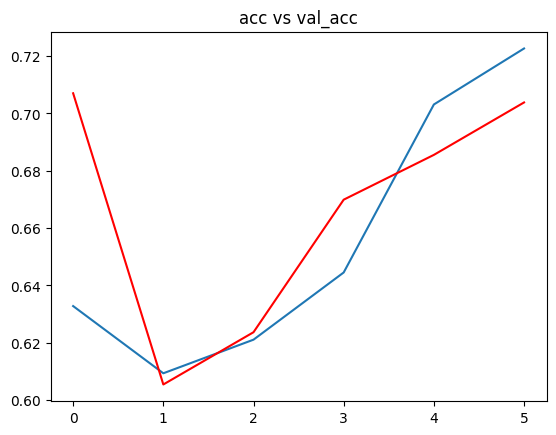

In [32]:
#As a first value of accuracy, it gave 0.66992 and stoped after 8 epochs from 30 => we will move now to the step of tunning hyperparam
#We change the patiene to 5 and it gave us better results: accuracy: 0.7291 - loss: 0.6935 - val_accuracy: 0.7038 - val_loss: 0.8934

#Step 5: See how the model is performing
h = hs.history
h.keys()
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('acc vs val_acc')
plt.show()

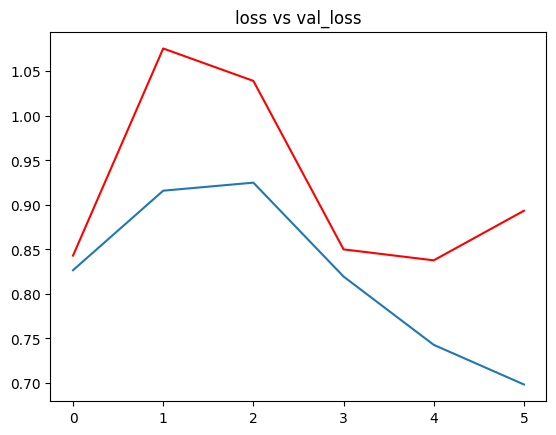

In [33]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs val_loss')
plt.show()

In [39]:
#Step 6: Model Accuracy
from keras.models import load_model

model1= load_model('model/bestmodel.keras')
acc = model1.evaluate(test_data)[1]
print(f'The accuracy of model is {acc*100}%')

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6814 - loss: 0.8428
The accuracy of model is 68.80244016647339%


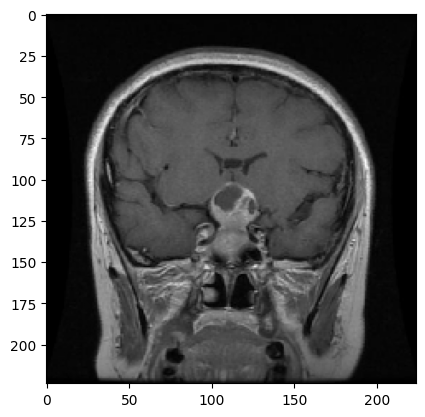

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The MRI is that of a patient with a pituitary tumor


In [ ]:
#Step 7: Make predictions and Show the results (MRI Image and the prediction)
from keras.preprocessing.image import load_img, img_to_array

path ="dataset\Training\pituitary\Tr-pi_0011.jpg" #This image I need it is a tumor of type 'pituitary'
img=load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

#Show the MRI Image
plt.imshow(input_arr)
plt.show()

input_arr = np.expand_dims(input_arr, axis=0)
pred = model1.predict(input_arr)
predicted_class = np.argmax(pred)
#pred contains the probabilities of the image existing in each class
#pred,predicted_class.item()

if predicted_class.item() == 0:
    print("The MRI is that of a patient with a glioma tumor")
elif predicted_class.item() == 1:
    print("The MRI is that of a patient with a meningioma tumor")
elif predicted_class.item() == 2:
    print("The MRI is that of a patient who does not have a tumor")
else: 
    print("The MRI is that of a patient with a pituitary tumor")

In [ ]:
train_data.class_indices #this will return how our data is mapped and we can use it to verify if the output is true

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}